In [228]:
#!pip install plotly

# Fields Details:

Date: The date of the record.

CountryRegion: The name of the country/region. 

-alpha-3code: country code for that can be used for map visualization.

Population: The population of the given country/region.

TotalConfirmedCases: Cumulative confirmed cases.

Total_Fatalities: Cumulative fatalities.

TotalRecoveredCases: Cumulative recovered cases.

NewConfirmedCases: Daily new confirmed cases.

New_Fatalities: Daily new fatalities.

NewRecoveredCases: Daily new recovered cases.

RemainingConfirmedCases: Remaining infected cases which equal to (cumulative confirmed cases - cumulative recovered cases - cumulative fatalities).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import math 
%matplotlib inline

In [3]:
df = pd.read_csv(r'Country_Level_Info.csv')
df.head()

Date Country_Region alpha-3_code  Population  Total_Confirmed_Cases  \
0  2020-01-22    Afghanistan          AFG    37172386                      0   
1  2020-01-22        Albania          ALB     2866376                      0   
2  2020-01-22        Algeria          DZA    42228429                      0   
3  2020-01-22        Andorra          AND       77006                      0   
4  2020-01-22         Angola          AGO    30809762                      0   

   Total_Fatalities  Total_Recovered_Cases  New_Confirmed_Cases  \
0                 0                      0                    0   
1                 0                      0                    0   
2                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   

   New_Fatalities  New_Recovered_Cases  Remaining_Confirmed_Cases  
0               0                    0                          0  
1               0                    0                          0  
2               0                    0                          0  
3               0                    0                          0  
4               0                    0                          0

In [4]:
df.tail()

Date         Country_Region alpha-3_code  Population  \
32895  2020-07-14  Sao Tome and Principe          STP      219159   
32896  2020-07-14                  Yemen          YEM    29825964   
32897  2020-07-14                Comoros          COM      869601   
32898  2020-07-14             Tajikistan          TJK     9537645   
32899  2020-07-14                Lesotho          LSO     2142249   

       Total_Confirmed_Cases  Total_Fatalities  Total_Recovered_Cases  \
32895                    732                14                    286   
32896                   1516               429                    685   
32897                    321                 7                    302   
32898                   6643                56                   5332   
32899                    256                 3                     48   

       New_Confirmed_Cases  New_Fatalities  New_Recovered_Cases  \
32895                    0               0                    0   
32896                   18               5                   10   
32897                    4               0                    6   
32898                   47               1                   54   
32899                   11               0                   15   

       Remaining_Confirmed_Cases  
32895                        432  
32896                        402  
32897                         12  
32898                       1255  
32899                        205

In [5]:
df.shape

(32900, 11)

In [6]:
df.isna().sum()

Date                           0
Country_Region                 0
alpha-3_code                 700
Population                     0
Total_Confirmed_Cases          0
Total_Fatalities               0
Total_Recovered_Cases          0
New_Confirmed_Cases            0
New_Fatalities                 0
New_Recovered_Cases            0
Remaining_Confirmed_Cases      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32900 entries, 0 to 32899
Data columns (total 11 columns):
Date                         32900 non-null object
Country_Region               32900 non-null object
alpha-3_code                 32200 non-null object
Population                   32900 non-null int64
Total_Confirmed_Cases        32900 non-null int64
Total_Fatalities             32900 non-null int64
Total_Recovered_Cases        32900 non-null int64
New_Confirmed_Cases          32900 non-null int64
New_Fatalities               32900 non-null int64
New_Recovered_Cases          32900 non-null int64
Remaining_Confirmed_Cases    32900 non-null int64
dtypes: int64(8), object(3)
memory usage: 2.8+ MB


In [8]:
df.describe(include='int')

Population  Total_Confirmed_Cases  Total_Fatalities  \
count  3.290000e+04           3.290000e+04      32900.000000   
mean   4.018555e+07           1.922578e+04       1074.148541   
std    1.457862e+08           1.221480e+05       6737.955228   
min    8.010000e+02           0.000000e+00          0.000000   
25%    2.245639e+06           1.000000e+00          0.000000   
50%    9.511516e+06           1.550000e+02          3.000000   
75%    2.956375e+07           2.665250e+03         58.000000   
max    1.392730e+09           3.431574e+06     136466.000000   

       Total_Recovered_Cases  New_Confirmed_Cases  New_Fatalities  \
count           3.290000e+04         32900.000000    32900.000000   
mean            8.615543e+03           404.970517       17.587477   
std             4.836702e+04          2536.292318      112.131219   
min             0.000000e+00        -10034.000000    -1918.000000   
25%             0.000000e+00             0.000000        0.000000   
50%             2.400000e+01             2.000000        0.000000   
75%             9.212500e+02            60.000000        1.000000   
max             1.323425e+06         67417.000000     2614.000000   

       New_Recovered_Cases  Remaining_Confirmed_Cases  
count          32900.00000               3.290000e+04  
mean             224.90304               9.536092e+03  
std             1756.96691               7.600756e+04  
min            -2637.00000               0.000000e+00  
25%                0.00000               0.000000e+00  
50%                0.00000               6.300000e+01  
75%               16.00000               1.117000e+03  
max           140050.00000               2.246010e+06

In [9]:
df.describe(include='object')

Date       Country_Region alpha-3_code
count        32900                32900        32200
unique         175                  188          184
top     2020-04-06  Trinidad and Tobago          KHM
freq           188                  175          175

In [10]:
filtered_df = df[df['alpha-3_code'].isnull()]
filtered_df

Date      Country_Region alpha-3_code  Population  \
39     2020-01-22    Diamond Princess          NaN        3711   
170    2020-01-22  West Bank and Gaza          NaN     4569087   
176    2020-01-22          MS Zaandam          NaN        1829   
181    2020-01-22         South Sudan          NaN    11193725   
227    2020-01-23    Diamond Princess          NaN        3711   
...           ...                 ...          ...         ...   
32705  2020-07-13         South Sudan          NaN    11193725   
32751  2020-07-14    Diamond Princess          NaN        3711   
32882  2020-07-14  West Bank and Gaza          NaN     4569087   
32888  2020-07-14          MS Zaandam          NaN        1829   
32893  2020-07-14         South Sudan          NaN    11193725   

       Total_Confirmed_Cases  Total_Fatalities  Total_Recovered_Cases  \
39                         0                 0                      0   
170                        0                 0                      0   
176                        0                 0                      0   
181                        0                 0                      0   
227                        0                 0                      0   
...                      ...               ...                    ...   
32705                   2148                41                    333   
32751                    712                13                    651   
32882                   6764                44                   1084   
32888                      9                 2                      0   
32893                   2148                41                    333   

       New_Confirmed_Cases  New_Fatalities  New_Recovered_Cases  \
39                       0               0                    0   
170                      0               0                    0   
176                      0               0                    0   
181                      0               0                    0   
227                      0               0                    0   
...                    ...             ...                  ...   
32705                  127               3                    0   
32751                    0               0                    0   
32882                  198               5                    0   
32888                    0               0                    0   
32893                    0               0                    0   

       Remaining_Confirmed_Cases  
39                             0  
170                            0  
176                            0  
181                            0  
227                            0  
...                          ...  
32705                       1774  
32751                         48  
32882                       5636  
32888                          7  
32893                       1774  

[700 rows x 11 columns]

In [11]:
filtered_df.shape

(700, 11)

In [12]:
df=df.drop(['alpha-3_code'],axis=1)

In [13]:
df.columns

Index(['Date', 'Country_Region', 'Population', 'Total_Confirmed_Cases',
       'Total_Fatalities', 'Total_Recovered_Cases', 'New_Confirmed_Cases',
       'New_Fatalities', 'New_Recovered_Cases', 'Remaining_Confirmed_Cases'],
      dtype='object')

In [14]:
df.corr()

Population  Total_Confirmed_Cases  \
Population                   1.000000               0.204952   
Total_Confirmed_Cases        0.204952               1.000000   
Total_Fatalities             0.166574               0.919392   
Total_Recovered_Cases        0.235728               0.889727   
New_Confirmed_Cases          0.234828               0.870318   
New_Fatalities               0.184545               0.610706   
New_Recovered_Cases          0.182729               0.637076   
Remaining_Confirmed_Cases    0.164598               0.959375   

                           Total_Fatalities  Total_Recovered_Cases  \
Population                         0.166574               0.235728   
Total_Confirmed_Cases              0.919392               0.889727   
Total_Fatalities                   1.000000               0.764828   
Total_Recovered_Cases              0.764828               1.000000   
New_Confirmed_Cases                0.744305               0.781389   
New_Fatalities                     0.628768               0.495058   
New_Recovered_Cases                0.517641               0.711269   
Remaining_Confirmed_Cases          0.902167               0.725690   

                           New_Confirmed_Cases  New_Fatalities  \
Population                            0.234828        0.184545   
Total_Confirmed_Cases                 0.870318        0.610706   
Total_Fatalities                      0.744305        0.628768   
Total_Recovered_Cases                 0.781389        0.495058   
New_Confirmed_Cases                   1.000000        0.759790   
New_Fatalities                        0.759790        1.000000   
New_Recovered_Cases                   0.685805        0.471233   
Remaining_Confirmed_Cases             0.835430        0.610670   

                           New_Recovered_Cases  Remaining_Confirmed_Cases  
Population                            0.182729                   0.164598  
Total_Confirmed_Cases                 0.637076                   0.959375  
Total_Fatalities                      0.517641                   0.902167  
Total_Recovered_Cases                 0.711269                   0.725690  
New_Confirmed_Cases                   0.685805                   0.835430  
New_Fatalities                        0.471233                   0.610670  
New_Recovered_Cases                   1.000000                   0.525313  
Remaining_Confirmed_Cases             0.525313                   1.000000

In [15]:
df.groupby(['Country_Region']).mean().round(decimals=4)

Population  Total_Confirmed_Cases  Total_Fatalities  \
Country_Region                                                            
Afghanistan         37172386.0              8417.6457          192.1486   
Albania              2866376.0               805.4857           23.7486   
Algeria             42228429.0              4934.1200          363.7429   
Andorra                77006.0               473.6057           27.1257   
Angola              30809762.0                71.8857            3.7486   
...                        ...                    ...               ...   
West Bank and Gaza   4569087.0               661.1029            3.0971   
Western Sahara        597339.0                 4.4057            0.2857   
Yemen               29825964.0               263.2971           67.3200   
Zambia              17351822.0               488.9143            6.5029   
Zimbabwe            14439018.0               149.6971            2.9829   

                    Total_Recovered_Cases  New_Confirmed_Cases  \
Country_Region                                                   
Afghanistan                     2783.8457             198.5143   
Albania                          499.7314              20.9543   
Algeria                         3080.0286             115.5200   
Andorra                          335.0571               4.9200   
Angola                            21.8800               3.0914   
...                                   ...                  ...   
West Bank and Gaza               181.0800              38.6514   
Western Sahara                     3.1086               0.0571   
Yemen                             80.7143               8.6629   
Zambia                           348.7086              10.8286   
Zimbabwe                          34.0914               6.0800   

                    New_Fatalities  New_Recovered_Cases  \
Country_Region                                            
Afghanistan                 5.9886             122.5943   
Albania                     0.5543              11.7829   
Algeria                     5.8743              81.6857   
Andorra                     0.2971               4.5886   
Angola                      0.1486               0.6743   
...                            ...                  ...   
West Bank and Gaza          0.2514               6.1943   
Western Sahara              0.0057               0.0457   
Yemen                       2.4514               3.9143   
Zambia                      0.2400               8.0686   
Zimbabwe                    0.1143               1.9600   

                    Remaining_Confirmed_Cases  
Country_Region                                 
Afghanistan                         5441.6514  
Albania                              282.0057  
Algeria                             1490.3486  
Andorra                              111.4229  
Angola                                46.2571  
...                                       ...  
West Bank and Gaza                   476.9257  
Western Sahara                         1.0114  
Yemen                                115.2629  
Zambia                               133.7029  
Zimbabwe                             112.6229  

[188 rows x 8 columns]

In [16]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d')

In [17]:
df['Date'].dtype

dtype('<M8[ns]')

In [42]:
df['Date_Month'] = df['Date'].map(lambda x: x.strftime('%m'))

df['Date_Year'] = df['Date'].map(lambda x: x.strftime('%Y'))

df['Date_Date'] = df['Date'].map(lambda x: x.strftime('%m%d'))

#df

In [19]:
df['Date_Month'].dtype

dtype('O')

In [20]:
df_filtered_country=df[df['Country_Region']=='India']

#df_filtered_country#.sort_values('Total_Confirmed_Cases',ascending=False)

#df_filtered_by_month=df[df['Date_Month']== '02']

#df_filtered_month_country=df_filtered__by_month[df_filtered__by_month['Country_Region']== 'US']

#df_filtered_month_country

In [21]:
group_date_month = df_filtered_country.groupby(['Date_Month','Country_Region']).max()#.reset_index()

group_date_month

#group_date_month.get_group('Afghanistan')

#group_date_month.(lambda x: x['Country_Region'] == 'Afghanistan')

Date  Population  Total_Confirmed_Cases  \
Date_Month Country_Region                                                 
01         India          2020-01-31  1352617328                      1   
02         India          2020-02-29  1352617328                      3   
03         India          2020-03-31  1352617328                   1397   
04         India          2020-04-30  1352617328                  34863   
05         India          2020-05-31  1352617328                 190609   
06         India          2020-06-30  1352617328                 585481   
07         India          2020-07-14  1352617328                 936181   

                           Total_Fatalities  Total_Recovered_Cases  \
Date_Month Country_Region                                            
01         India                          0                      0   
02         India                          0                      3   
03         India                         35                    123   
04         India                       1154                   9068   
05         India                       5408                  91852   
06         India                      17400                 347912   
07         India                      24309                 592032   

                           New_Confirmed_Cases  New_Fatalities  \
Date_Month Country_Region                                        
01         India                             1               0   
02         India                             1               0   
03         India                           227               8   
04         India                          1893              75   
05         India                          8782             269   
06         India                         19906            2003   
07         India                         29429             613   

                           New_Recovered_Cases  Remaining_Confirmed_Cases  \
Date_Month Country_Region                                                   
01         India                             0                          1   
02         India                             3                          3   
03         India                            28                       1239   
04         India                           702                      24641   
05         India                         11707                      93349   
06         India                         13940                     220169   
07         India                         20572                     319840   

                          Date_Year  
Date_Month Country_Region            
01         India               2020  
02         India               2020  
03         India               2020  
04         India               2020  
05         India               2020  
06         India               2020  
07         India               2020

In [22]:
# for whole dataset

group_date_month = df.groupby(['Date_Month','Country_Region']).max()#.reset_index()

#group_date_month.get_group('Afghanistan')

#group_date_month.apply(lambda x: x['Country_Region'] == 'Afghanistan', axis=1)

group_date_month

Date  Population  Total_Confirmed_Cases  \
Date_Month Country_Region                                                     
01         Afghanistan        2020-01-31    37172386                      0   
           Albania            2020-01-31     2866376                      0   
           Algeria            2020-01-31    42228429                      0   
           Andorra            2020-01-31       77006                      0   
           Angola             2020-01-31    30809762                      0   
...                                  ...         ...                    ...   
07         West Bank and Gaza 2020-07-14     4569087                   6764   
           Western Sahara     2020-07-14      597339                     10   
           Yemen              2020-07-14    29825964                   1516   
           Zambia             2020-07-14    17351822                   1895   
           Zimbabwe           2020-07-14    14439018                   1064   

                               Total_Fatalities  Total_Recovered_Cases  \
Date_Month Country_Region                                                
01         Afghanistan                        0                      0   
           Albania                            0                      0   
           Algeria                            0                      0   
           Andorra                            0                      0   
           Angola                             0                      0   
...                                         ...                    ...   
07         West Bank and Gaza                44                   1084   
           Western Sahara                     1                      8   
           Yemen                            429                    685   
           Zambia                            42                   1412   
           Zimbabwe                          20                    343   

                               New_Confirmed_Cases  New_Fatalities  \
Date_Month Country_Region                                            
01         Afghanistan                           0               0   
           Albania                               0               0   
           Algeria                               0               0   
           Andorra                               0               0   
           Angola                                0               0   
...                                            ...             ...   
07         West Bank and Gaza                  501               6   
           Western Sahara                        0               0   
           Yemen                                76              52   
           Zambia                              263              12   
           Zimbabwe                             98               5   

                               New_Recovered_Cases  Remaining_Confirmed_Cases  \
Date_Month Country_Region                                                       
01         Afghanistan                           0                          0   
           Albania                               0                          0   
           Algeria                               0                          0   
           Andorra                               0                          0   
           Angola                                0                          0   
...                                            ...                        ...   
07         West Bank and Gaza                  406                       5636   
           Western Sahara                        0                          1   
           Yemen                                24                        402   
           Zambia                               64                        505   
           Zimbabwe                            114                        701   

                              Date_Year  
Date_Month Country_Region             

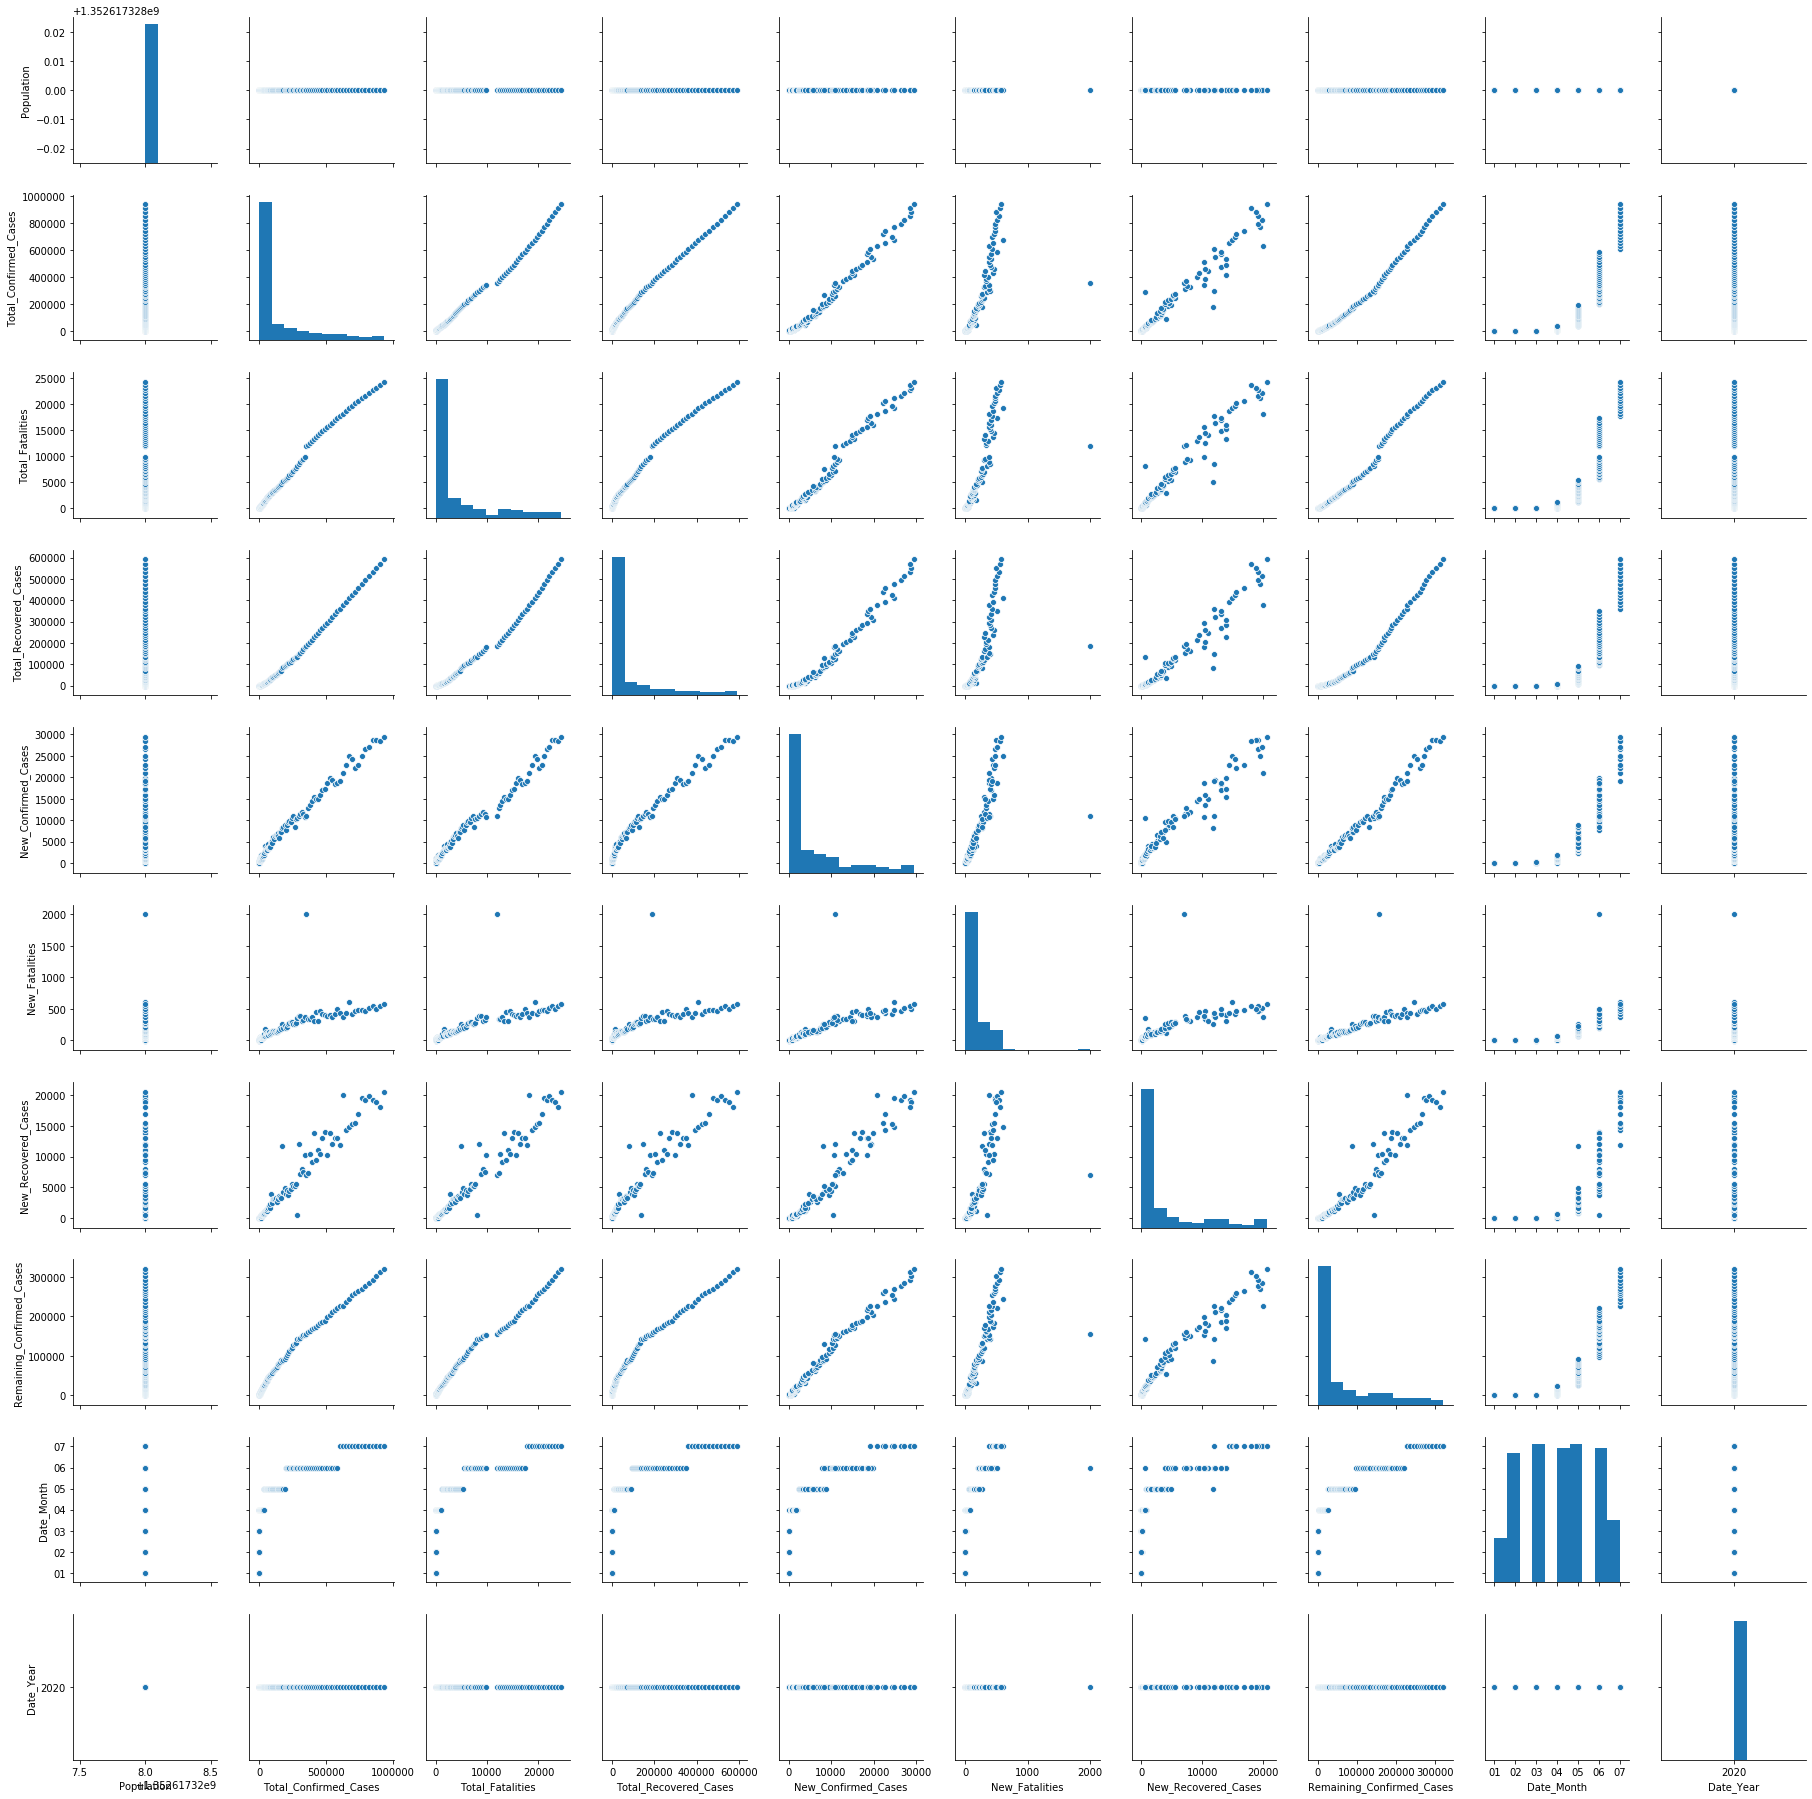

In [250]:
#ax = sns.pairplot(df)  # for all the columns

ax = sns.pairplot(df[df['Country_Region']=='India']) # Comparing for one Country


In [26]:
df.shape

(32900, 12)

In [25]:
#Create sorted data table for Countries by Total confirmed Cases

sorted_data=df.groupby('Country_Region').max().reset_index()

sorted_data=sorted_data.sort_values('Total_Confirmed_Cases', ascending=False)

sorted_data = sorted_data.head(10)

sorted_data

Country_Region       Date  Population  Total_Confirmed_Cases  \
174              US 2020-07-14   327200000                3431574   
23           Brazil 2020-07-14   209469333                1926824   
79            India 2020-07-14  1352617328                 936181   
140          Russia 2020-07-14   144478050                 738787   
134            Peru 2020-07-14    31989256                 333867   
35            Chile 2020-07-14    18729160                 319493   
113          Mexico 2020-07-14   126190788                 311486   
156    South Africa 2020-07-14    57779622                 298292   
178  United Kingdom 2020-07-14    66488991                 292931   
81             Iran 2020-07-14    81800269                 262173   

     Total_Fatalities  Total_Recovered_Cases  New_Confirmed_Cases  \
174            136466                1049098                67417   
23              74133                1323425                54771   
79              24309                 592032                29429   
140             11597                 511958                11656   
134             12229                 223261                 8987   
35               7069                 289220                36179   
113             36327                 245830                 7280   
156              4346                 146279                13674   
178             45053                   1385                 5505   
81              13211                 225270                 3574   

     New_Fatalities  New_Recovered_Cases  Remaining_Confirmed_Cases  \
174            2614               103921                    2246010   
23             1473               140050                     570479   
79             2003                20572                     319840   
140             232                12375                     245382   
134             380                 8581                     108616   
35              627                41227                      59099   
113            1092                 6379                      30682   
156             192                 9483                     147667   
178            1173                  229                     246493   
81              221                 6482                      34887   

    Date_Month Date_Year  
174         07      2020  
23          07      2020  
79          07      2020  
140         07      2020  
134         07      2020  
35          07      2020  
113         07      2020  
156         07      2020  
178         07      2020  
81          07      2020

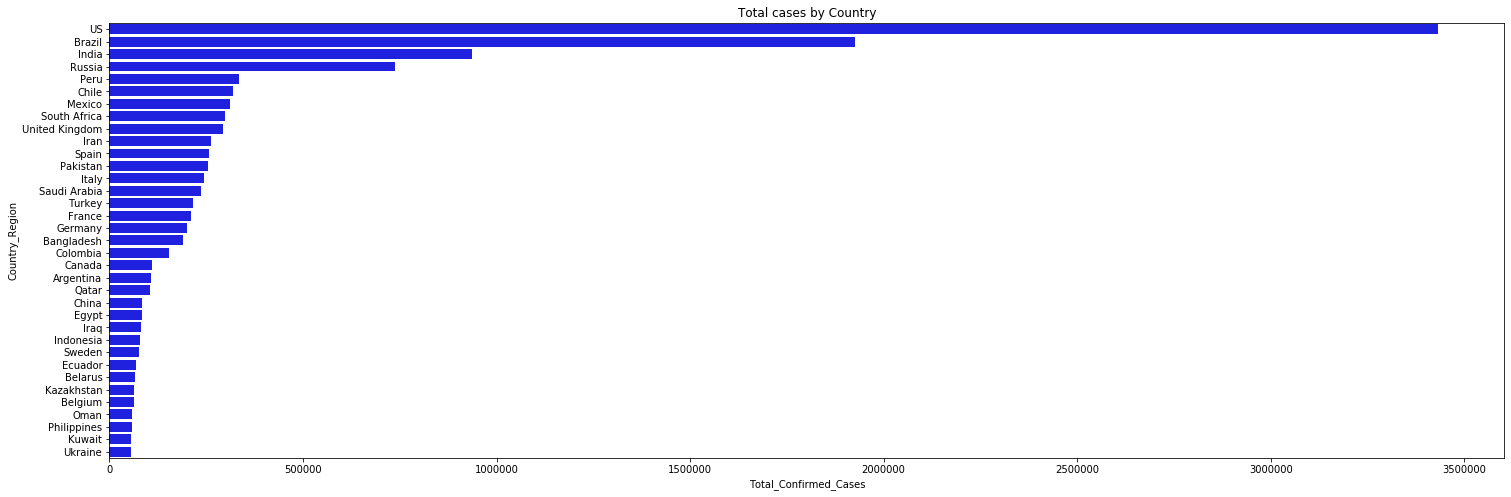

In [20]:
# Create a plot

plt.figure(figsize=(25,8))

# Add title
plt.title("Total cases by Country")

#grouped_data=df.groupby('Country_Region').sum().reset_index()

#grouped_data=grouped_data.sort_values('Total_Confirmed_Cases', ascending=False)
#grouped_data
#y_pos = np.arange(len(bars))

g = sns.barplot(x="Total_Confirmed_Cases", y="Country_Region", data=sorted_data,
            color="b",label="Total")
           
    
#label="Total", aspect=.7,hue = "Country_Region",orient="v" , #errcolor='.26'
#sns.barplot(x = grouped_data['Total_Confirmed_Cases'], y=grouped_data)
#df['Total_Confirmed_Cases'].sum()

In [42]:
sorted_data1=sorted_data.sort_values('Total_Confirmed_Cases', ascending=False)

fig = px.sunburst(
    data_frame = sorted_data1,
    path = ['Country_Region', "Population", "Total_Confirmed_Cases", "Total_Recovered_Cases"],
    #color = "Country_Region",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth = -1,
    branchvalues='remainder'
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

[Text(0, 0.5, 'Active Cases'), Text(0.5, 0, 'Months')]

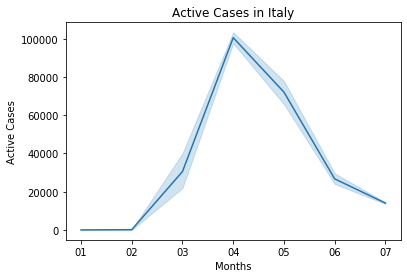

In [21]:
#ax = sns.scatterplot(x=df['date_month'], y=df['Total_Confirmed_Cases'], data=df)

temp =df[df['Country_Region']=='Italy']

plt.title("Active Cases in Italy")

ax = sns.lineplot(x=temp.Date_Month, y=temp.Remaining_Confirmed_Cases, data=temp)

ax.set(xlabel='Months', ylabel='Active Cases')

In [18]:
total = df.groupby('Date')['Total_Confirmed_Cases', 'Total_Fatalities', 
                           'Total_Recovered_Cases', 'Remaining_Confirmed_Cases'].sum().reset_index()

total = total[total['Date'] == max(total['Date'])].reset_index(drop=True)

total

#Acive cases(remaining_Confirm_cases) = Total cases - Total Death - Total Recovery

Date  Total_Confirmed_Cases  Total_Fatalities  Total_Recovered_Cases  \
0 2020-07-14               13323530            578628                7399310   

   Remaining_Confirmed_Cases  
0                    5345592

[Text(0, 0.5, 'Total_Confirmed_Cases'), Text(0.5, 0, 'Day by Day')]

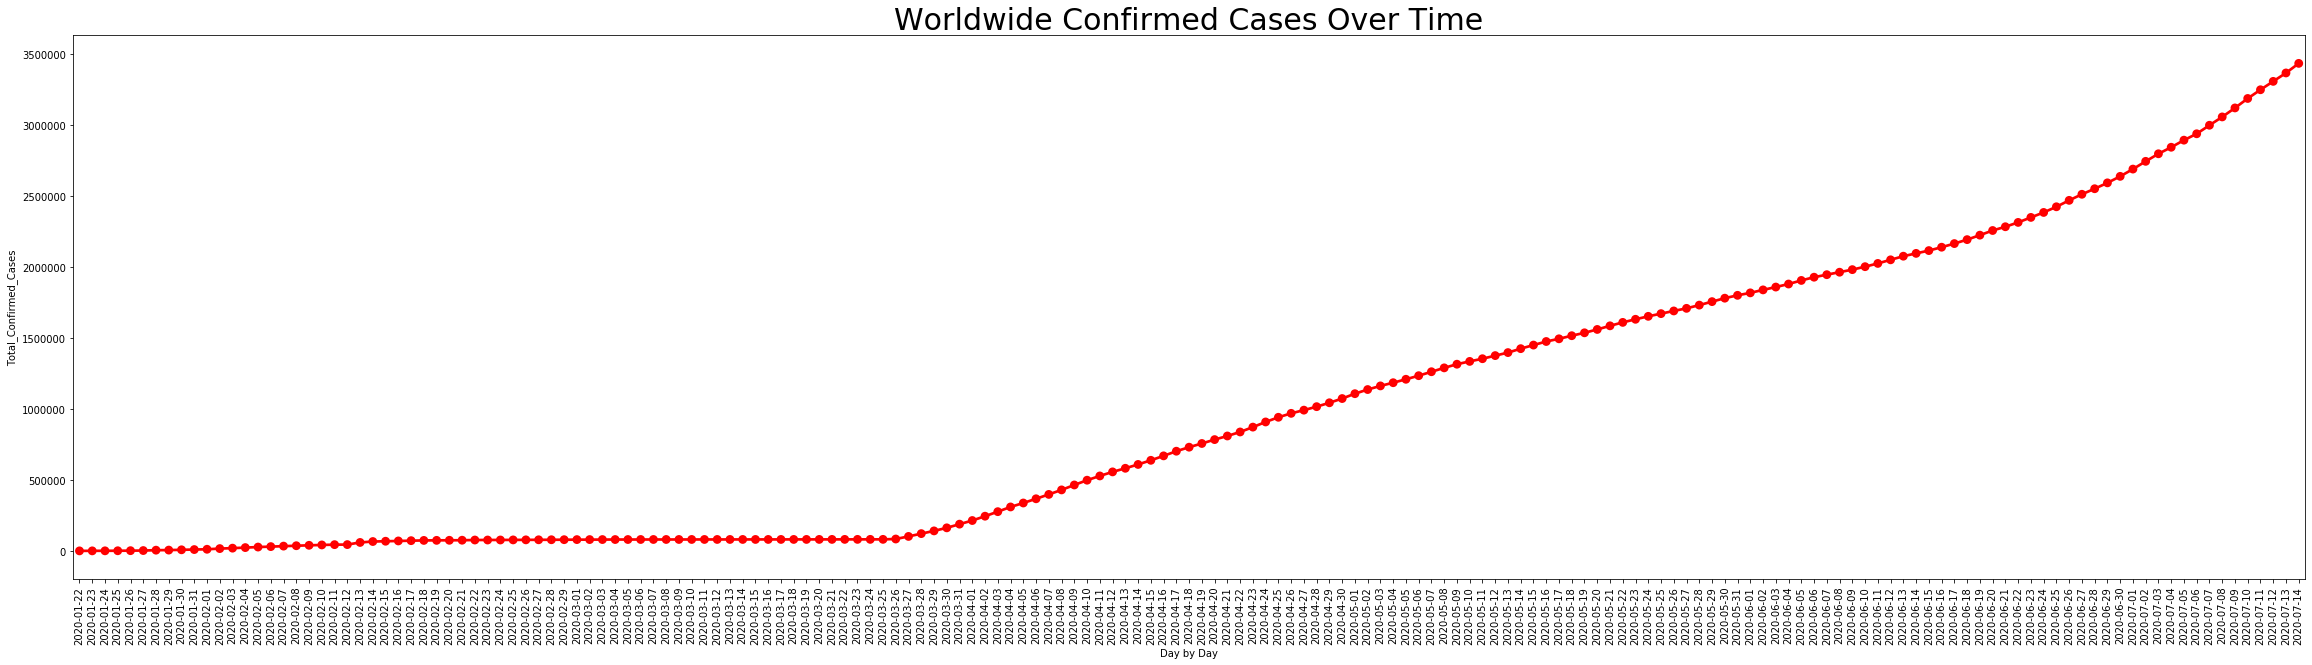

In [23]:
plt.figure(figsize= (40,10))

plt.xticks(rotation = 90 ,fontsize = 10)

plt.yticks(fontsize = 10)

#plt.xlabel('Day by Day',fontsize = 30)

#plt.ylabel('Total_Confirmed_Cases',fontsize = 30)

plt.title("Worldwide Confirmed Cases Over Time" , fontsize = 30)

total_cases = df.groupby('Date')['Date', 'Total_Confirmed_Cases'].max()#.reset_index()

#total_cases['Date'] = pd.to_datetime(total_cases['Date'])


ax = sns.pointplot( x = total_cases.Date.dt.date ,y = total_cases.Total_Confirmed_Cases , color = 'r')

ax.set(xlabel='Day by Day', ylabel='Total_Confirmed_Cases')

In [17]:

sorted_data_active = sorted_data.sort_values('Remaining_Confirmed_Cases', ascending=False)

sorted_data_active = sorted_data_active.head(35)

#sorted_data_active

In [18]:
fig = px.bar(sorted_data_active, x='Country_Region', y='Remaining_Confirmed_Cases', 
             text='Remaining_Confirmed_Cases', title = 'Most Active Cases around the World')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')#, yaxis=dict(title='USD (millions)')

fig.show()
#py.offline.iplot(fig)

In [25]:
sorted_data_deaths=sorted_data.sort_values('Total_Fatalities', ascending=False)

sorted_data_death = sorted_data_deaths.head(35)

#sorted_data_death

In [26]:
fig = px.bar(sorted_data_death, x='Country_Region', y='Total_Fatalities', 
             text='Total_Fatalities', title = 'Most Death Cases around the World')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

In [28]:
total_new_cases = df.groupby('Country_Region')['Country_Region', 
                                               'Total_Recovered_Cases', 'Total_Confirmed_Cases','Total_Fatalities'].max()#.reset_index()
total_new_cases=total_new_cases.sort_values('Total_Confirmed_Cases', ascending = False)
total_new_cases=total_new_cases.head(35)
#total_new_cases

In [29]:
fig = go.Figure()

fig.add_trace(go.Bar(x=total_new_cases.Country_Region,
                y=total_new_cases.Total_Confirmed_Cases,
                name='Confirmed',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=total_new_cases.Country_Region,
                y=total_new_cases.Total_Recovered_Cases,
                name='Recovered',
                marker_color='rgb(26, 118, 255)'
                ))

fig.add_trace(go.Bar(x=total_new_cases.Country_Region,
                y=total_new_cases.Total_Fatalities,
                name='Deaths',
                marker_color='rgb(200, 20, 25)'
                ))

fig.update_layout(
    title='Total Cases vs. Total Recovered',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='COVID-19 Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()

In [ ]:
df.columns

# Feature Engineering

In [33]:
temp = df.groupby('Country_Region')['Country_Region', 'Total_Fatalities', 'Total_Recovered_Cases', 
                                    'Total_Confirmed_Cases'].max()

temp['Rate_of_Deaths'] = round(temp['Total_Fatalities']/temp['Total_Confirmed_Cases'], 3)*100
temp['Rate_of_Recovery'] = round(temp['Total_Recovered_Cases']/temp['Total_Confirmed_Cases'], 3)*100

temp = temp.sort_values('Total_Confirmed_Cases', ascending=False)

temp = temp.head(35)

#temp

In [35]:
fig = go.Figure()

fig.add_trace(go.Bar(x=temp.Country_Region,
                y=temp.Rate_of_Recovery,
                name='Recovery Rate',
                marker_color='rgb(26, 118, 255)'
                ))

fig.add_trace(go.Bar(x=temp.Country_Region,
                y=temp.Rate_of_Deaths,
                name='Death Rate',
                marker_color='rgb(55, 83, 109)'
                ))

fig.update_layout(
    title='Deaths vs Recovery based for the Countries having highest number of Cases',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='Percentage',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()

In [36]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=temp.Country_Region,
                         y=temp.Rate_of_Recovery,
                         mode='lines',
                         name='Recovery Rate',
                         marker_color='rgb(0, 20, 20)'))

fig.add_trace(go.Scatter(x=total_new_cases.Country_Region,
                     y=temp.Rate_of_Deaths,
                     mode='lines',
                     name='Death Rate',
                     marker_color='rgb(255, 0, 0)' ))

#data = [trace1, trace2]
fig.update_layout(
    title='Deaths vs Recovery based for the Countries having highest number of Cases',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='Percentage',
        zeroline = True,
        showline = True,
        titlefont_size=16,
        tickfont_size=14))
              
#fig = dict(data = data, layout = layo`aaut)

#fig.show()

# When calculating the mortality rate, we need:

The number of actual cases. We need to know the number of actual cases (not merely the reported ones, which are typically only a small portion of the actual ones) that have already had an outcome (positive or negative: recovery or death), not the current cases that still have to resolve (the case sample shall contain zero active cases and include only "closed" cases).
The number of actual deaths related to the closed cases examined above.
Considering that a large number of cases are asymptomatic (or present with very mild symptoms) and that testing has not been performed on the entire population, only a fraction of the SARS-CoV-2 infected population is detected, confirmed through a laboratory test, and officially reported as a COVID-19 case. The number of actual cases is therefore estimated to be at several multiples above the number of reported cases. The number of deaths also tends to be underestimated, as some patients are not hospitalized and not tested.

Infection Fatality Rate (23k / 1.7M = 1.4% IFR):
Actual Cases with an outcome as of May 1 = estimated actual recovered (1,671,351) + estimated actual deaths (23,430) = 1,694,781.

Infection Fatality Rate (IFR) = Deaths / Cases = 23,430 / 1,694,781 = 1.4% (1.4% of people infected with SARS-CoV-2 have a fatal outcome, while 98.6% recover).

Mortality Rate (23k / 8.4M = 0.28% CMR to date) and Probability of Dying:

As of May 1, 23,430 people are estimated to have died out of a total population of 8,398,748 in New York City. This corresponds to a 0.28% crude mortality rate to date, or 279 deaths per 100,000 population, or 1 death every 358 people. Note that the Crude Mortality Rate will continue to increase as more infections and deaths occur (see notes under the paragraph "Herd Immunity" below for details).

In [50]:
#Infection Fatality Rate

temp1 = df.groupby(['Date_Month','Country_Region'])['Date','Date_Month', 'Total_Fatalities',
                                     'Total_Recovered_Cases','Country_Region'].max()#.reset_index()

temp1['Actual_Cases'] = temp1['Total_Fatalities']+temp1['Total_Recovered_Cases']

temp1['Infection_Fatality_Rate'] = round(temp1['Total_Fatalities']/temp1['Actual_Cases'],5)*100

temp1 = temp1.sort_values('Date_Month', ascending=False)

#temp1 = temp1[temp1['Country_Region']=='India']

temp1 = temp1.head(20)
temp1
#df_filtered_country=df[df['Country_Region']=='India']

Date  Total_Fatalities  \
Date_Month Country_Region                                    
07         Zimbabwe           2020-07-14                20   
           Eswatini           2020-07-14                20   
           Ghana              2020-07-14               139   
           Germany            2020-07-14              9078   
           Georgia            2020-07-14                15   
           Gambia             2020-07-14                 3   
           Gabon              2020-07-14                46   
           France             2020-07-14             30032   
           Finland            2020-07-14               329   
           Fiji               2020-07-14                 0   
           Ethiopia           2020-07-14               139   
           Estonia            2020-07-14                69   
           Grenada            2020-07-14                 0   
           Eritrea            2020-07-14                 0   
           Equatorial Guinea  2020-07-14                51   
           El Salvador        2020-07-14               278   
           Egypt              2020-07-14              4008   
           Ecuador            2020-07-14              5130   
           Dominican Republic 2020-07-14               910   
           Dominica           2020-07-14                 0   

                               Total_Recovered_Cases  Actual_Cases  \
Date_Month Country_Region                                            
07         Zimbabwe                              343           363   
           Eswatini                              695           715   
           Ghana                               21067         21206   
           Germany                            185100        194178   
           Georgia                               870           885   
           Gambia                                 34            37   
           Gabon                                3475          3521   
           France                              78722        108754   
           Finland                              6800          7129   
           Fiji                                   18            18   
           Ethiopia                             2430          2569   
           Estonia                              1897          1966   
           Grenada                                23            23   
           Eritrea                               107           107   
           Equatorial Guinea                     842           893   
           El Salvador                          5919          6197   
           Egypt                               25544         29552   
           Ecuador                             30484         35614   
           Dominican Republic                  23134         24044   
           Dominica                               18            18   

                               Infection_Fatality_Rate  
Date_Month Country_Region                               
07         Zimbabwe                              5.510  
           Eswatini                              2.797  
           Ghana                                 0.655  
           Germany                               4.675  
           Georgia                               1.695  
           Gambia                                8.108  
           Gabon                                 1.306  
           France                               27.615  
           Finland                               4.615  
           Fiji                                  0.000  
           Ethiopia                              5.411  
           Estonia                               3.510  
           Grenada                               0.000  
           Eritrea                               0.000  
           Equatorial Guinea                     5.711  
           El Salvador                           4.486  
           Egypt                                13.563  
           Ecuador                             

In [49]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=temp1.Country_Region,
                         y=temp.Rate_of_Recovery,
                         mode='lines',
                         name='Recovery Rate',
                         marker_color='rgb(55, 100, 20)'))



In [52]:
ax = sns.lineplot(x=temp1.Date, y=temp1.Infection_Fatality_Rate, hue=temp1.Date_Month,data=temp1)

ax.set(xlabel='Months', ylabel='Fatality Rate')

AttributeError: 'DataFrame' object has no attribute 'Date_Month'

In [ ]:
#temp1['Mortality_Rate'] = (temp1['Total_Fatalities']/(temp1['Population']))*1000000

In [ ]:
df_2020

In [ ]:
['Country_Region','Total_Confirmed_Cases',
                                              'Remaining_Confirmed_Cases','Population','Total_Recovered_Cases',
                                             'Population']

In [ ]:


#df_2020 = df[df['Date_Year']=='2020']
df_2020 = df.groupby('Country_Region')['Country_Region','Total_Confirmed_Cases',
                                       'Remaining_Confirmed_Cases','Population','Total_Recovered_Cases',
                                       'Population','Total_Fatalities'].max()#.reset_index()
df_2020 = df_2020.sort_values('Total_Confirmed_Cases', ascending = False)
#df_2020 = df_2020.head(40)

hover_text = []
bubble_size = []

for index, row in df_2020.iterrows():
    hover_text.append(('Country: {Country_Region}<br>'+
                      'Total Confirmed Cases: {Total_Confirmed_Cases}<br>'+
                      'Remaining Confirmed Cases: {Remaining_Confirmed_Cases}<br>'+
                      'Population: {Population}<br>'+
                      'Total Recovered Cases: {Total_Recovered_Cases}').format(Country_Region=row['Country_Region'],
                                                                        Total_Confirmed_Cases=row['Total_Confirmed_Cases'],
                                                                        Remaining_Confirmed_Cases=row['Remaining_Confirmed_Cases'],
                                                                        Population=row['Population'],
                                                                        Total_Recovered_Cases=row['Total_Recovered_Cases']))
    bubble_size.append(math.sqrt(row['Total_Confirmed_Cases']))


df_2020['text'] = hover_text
df_2020['size'] = bubble_size

sizeref = 2.*max(df_2020['size'])/(100**2)

country_names = df_2020['Country_Region']
country_data = {Country_Region: df_2020.head(30)# == '%s' " %Country_Region)
                               for Country_Region in country_names}


fig = go.Figure()

for country_name, country_detail in country_data.items():
    fig.add_trace(go.Scatter(
        x=country_detail['Total_Confirmed_Cases'], y=country_detail['Total_Fatalities'],
        name=country_name, text=country_detail['text'],
        marker_size=country_detail['size'],
        ))
    

fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Total Confirmed Cases vs Total Deaths ',
    xaxis=dict(
        title='Total Number of Confirmed Cases',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Total Number of Deaths',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

In [32]:
Date = (df['Date'])

In [35]:
Date[]

Timestamp('2020-01-22 00:00:00')

In [38]:
Date.value_counts()

2020-04-09    188
2020-03-29    188
2020-06-09    188
2020-06-22    188
2020-07-05    188
             ... 
2020-07-07    188
2020-01-26    188
2020-02-08    188
2020-02-21    188
2020-03-27    188
Name: Date, Length: 175, dtype: int64

In [43]:
df

Date         Country_Region  Population  Total_Confirmed_Cases  \
0     2020-01-22            Afghanistan    37172386                      0   
1     2020-01-22                Albania     2866376                      0   
2     2020-01-22                Algeria    42228429                      0   
3     2020-01-22                Andorra       77006                      0   
4     2020-01-22                 Angola    30809762                      0   
...          ...                    ...         ...                    ...   
32895 2020-07-14  Sao Tome and Principe      219159                    732   
32896 2020-07-14                  Yemen    29825964                   1516   
32897 2020-07-14                Comoros      869601                    321   
32898 2020-07-14             Tajikistan     9537645                   6643   
32899 2020-07-14                Lesotho     2142249                    256   

       Total_Fatalities  Total_Recovered_Cases  New_Confirmed_Cases  \
0                     0                      0                    0   
1                     0                      0                    0   
2                     0                      0                    0   
3                     0                      0                    0   
4                     0                      0                    0   
...                 ...                    ...                  ...   
32895                14                    286                    0   
32896               429                    685                   18   
32897                 7                    302                    4   
32898                56                   5332                   47   
32899                 3                     48                   11   

       New_Fatalities  New_Recovered_Cases  Remaining_Confirmed_Cases  \
0                   0                    0                          0   
1                   0                    0                          0   
2                   0                    0                          0   
3                   0                    0                          0   
4                   0                    0                          0   
...               ...                  ...                        ...   
32895               0                    0                        432   
32896               5                   10                        402   
32897               0                    6                         12   
32898               1                   54                       1255   
32899               0                   15                        205   

      Date_Month Date_Year Date_Date  
0             01      2020      0122  
1             01      2020      0122  
2             01      2020      0122  
3             01      2020      0122  
4             01      2020      0122  
...          ...       ...       ...  
32895         07      2020      0714  
32896         07      2020      0714  
32897         07      2020      0714  
32898         07      2020      0714  
32899         07      2020      0714  

[32900 rows x 13 columns]

In [48]:
#sorted_data=df.groupby('Country_Region').max().reset_index()

sorted_data1=df.sort_values('Total_Confirmed_Cases', ascending=False)

sorted_data1 = sorted_data1[sorted_data1['Country_Region'].isin(['US', 'India'])]
#sorted_data = sorted_data.head(10)

sorted_data1

Date Country_Region  Population  Total_Confirmed_Cases  \
32868 2020-07-14             US   327200000                3431574   
32680 2020-07-13             US   327200000                3364157   
32492 2020-07-12             US   327200000                3304942   
32304 2020-07-11             US   327200000                3245925   
32116 2020-07-10             US   327200000                3184573   
...          ...            ...         ...                    ...   
71    2020-01-22          India  1352617328                      0   
447   2020-01-24          India  1352617328                      0   
259   2020-01-23          India  1352617328                      0   
1199  2020-01-28          India  1352617328                      0   
1387  2020-01-29          India  1352617328                      0   

       Total_Fatalities  Total_Recovered_Cases  New_Confirmed_Cases  \
32868            136466                1049098                67417   
32680            135566                1031939                59215   
32492            135205                1006326                59017   
32304            134777                 995576                61352   
32116            134092                 983185                66627   
...                 ...                    ...                  ...   
71                    0                      0                    0   
447                   0                      0                    0   
259                   0                      0                    0   
1199                  0                      0                    0   
1387                  0                      0                    0   

       New_Fatalities  New_Recovered_Cases  Remaining_Confirmed_Cases  \
32868             900                17159                    2246010   
32680             361                25613                    2196652   
32492             428                10750                    2163411   
32304             685                12391                    2115572   
32116             802                14074                    2067296   
...               ...                  ...                        ...   
71                  0                    0                          0   
447                 0                    0                          0   
259                 0                    0                          0   
1199                0                    0                          0   
1387                0                    0                          0   

      Date_Month Date_Year Date_Date  
32868         07      2020      0714  
32680         07      2020      0713  
32492         07      2020      0712  
32304         07      2020      0711  
32116         07      2020      0710  
...          ...       ...       ...  
71            01      2020      0122  
447           01      2020      0124  
259           01      2020      0123  
1199          01      2020      0128  
1387          01      2020      0129  

[350 rows x 13 columns]

In [49]:
df

Date         Country_Region  Population  Total_Confirmed_Cases  \
0     2020-01-22            Afghanistan    37172386                      0   
1     2020-01-22                Albania     2866376                      0   
2     2020-01-22                Algeria    42228429                      0   
3     2020-01-22                Andorra       77006                      0   
4     2020-01-22                 Angola    30809762                      0   
...          ...                    ...         ...                    ...   
32895 2020-07-14  Sao Tome and Principe      219159                    732   
32896 2020-07-14                  Yemen    29825964                   1516   
32897 2020-07-14                Comoros      869601                    321   
32898 2020-07-14             Tajikistan     9537645                   6643   
32899 2020-07-14                Lesotho     2142249                    256   

       Total_Fatalities  Total_Recovered_Cases  New_Confirmed_Cases  \
0                     0                      0                    0   
1                     0                      0                    0   
2                     0                      0                    0   
3                     0                      0                    0   
4                     0                      0                    0   
...                 ...                    ...                  ...   
32895                14                    286                    0   
32896               429                    685                   18   
32897                 7                    302                    4   
32898                56                   5332                   47   
32899                 3                     48                   11   

       New_Fatalities  New_Recovered_Cases  Remaining_Confirmed_Cases  \
0                   0                    0                          0   
1                   0                    0                          0   
2                   0                    0                          0   
3                   0                    0                          0   
4                   0                    0                          0   
...               ...                  ...                        ...   
32895               0                    0                        432   
32896               5                   10                        402   
32897               0                    6                         12   
32898               1                   54                       1255   
32899               0                   15                        205   

      Date_Month Date_Year Date_Date  
0             01      2020      0122  
1             01      2020      0122  
2             01      2020      0122  
3             01      2020      0122  
4             01      2020      0122  
...          ...       ...       ...  
32895         07      2020      0714  
32896         07      2020      0714  
32897         07      2020      0714  
32898         07      2020      0714  
32899         07      2020      0714  

[32900 rows x 13 columns]

In [52]:
dict_keys=['one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve','thirteen',
           'fourteen','fifteen','sixteen','seventeen','eighteen','nineteen','twenty','twentyone','twentytwo',
           'twentythree','twentyfour','twentyfive','twentysix','twentyseven','twentyeight']

years=[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,
       2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

n_frame={}

for y, d in zip(years, dict_keys):
    dataframe=df[(df['year']==y)&(df['region']=='US')]
    dataframe=dataframe.nlargest(n=5,columns=['suicide rate (deaths per 100,000)'])
    dataframe=dataframe.sort_values(by=['year','suicide rate (deaths per 100,000)'])

    n_frame[d]=dataframe

SyntaxError: invalid syntax (<ipython-input-52-047fbdf45df8>, line 12)